# reduce, accumulate

# Сумма кубов



In [5]:
# --------------------------------------------------------------
# Задача:
# Напишите программу, которая представляет переданное натуральное
# число N в виде суммы не более чем 7 кубов других натуральных чисел.
#
# Формат ввода:
# Вход содержит одно целое число N.
#
# Формат вывода:
# Программа должна вывести любое разложение N в виде суммы кубов
# не более чем 7 натуральных чисел. Выведите основания кубов
# (a1 a2 ... ak), такие что N = a1^3 + a2^3 + ... + ak^3, k ≤ 7.
# Если такое разложение невозможно, выведите число 0.
#
# Пример:
# Ввод: 5
# Вывод: 1 1 1 1 1
# --------------------------------------------------------------

import math

def icbrt(n: int) -> int:
    """floor(cuberoot(n)) без плавающих ошибок."""
    x = int(round(n ** (1/3)))
    while (x + 1) ** 3 <= n:
        x += 1
    while x > 0 and x ** 3 > n:
        x -= 1
    return x

def solve_dp(N: int, K: int = 7):
    # Подготовим все кубы ≤ N
    bases = list(range(1, icbrt(N) + 1))
    cubes = [a*a*a for a in bases]

    INF = 10**9
    dp = [INF] * (N + 1)   # dp[s] — минимальное число кубов для суммы s
    prev = [-1]  * (N + 1) # prev[s] — предыдущая сумма
    pick = [0]   * (N + 1) # pick[s] — какое основание куба взяли на шаге s

    dp[0] = 0
    for s in range(1, N + 1):
        for a, c in zip(bases, cubes):
            if c > s:
                break
            cand = dp[s - c] + 1
            if cand < dp[s]:
                dp[s] = cand
                prev[s] = s - c
                pick[s] = a

    if dp[N] <= K:
        # восстановим одно разложение
        ans = []
        s = N
        while s > 0:
            ans.append(pick[s])
            s = prev[s]
        ans.sort(reverse=True)
        return ans
    else:
        return None

if __name__ == "__main__":
    N = 35  # из примера; поменяйте на нужное число
    ans = solve_dp(N, 7)
    if ans is None:
        print(0)
    else:
        print(*ans)

# Решение рекурсией
import sys
from functools import lru_cache

def icbrt(n: int) -> int:
    """Целая кубическая корень: floor(cuberoot(n))."""
    x = int(round(n ** (1/3)))
    if x < 0:
        x = 0
    while (x + 1) ** 3 <= n:
        x += 1
    while x ** 3 > n and x > 0:
        x -= 1
    return x

@lru_cache(maxsize=None)
def dfs(n: int, k: int, bmax: int):
    """
    Ищет представление n как суммы не более k кубов,
    значения (основания кубов) не превышают bmax и
    идут невозрастающе (для уменьшения перебора).
    Возвращает кортеж оснований или None.
    """
    if n == 0:
        return ()
    if k == 0 or bmax == 0:
        return None

    b = min(icbrt(n), bmax)

    # Отсечение: даже взяв k раз самый большой разрешённый куб, не дотянем
    if (b ** 3) * k < n:
        return None

    for a in range(b, 0, -1):
        c = a * a * a
        if c > n:
            continue
        rest = dfs(n - c, k - 1, a)  # можно использовать тот же a или меньше
        if rest is not None:
            return (a,) + rest
    return None

def main():
    data = sys.stdin.read().strip()
    n = int(data)
    ans = dfs(n, 7, icbrt(n))
    if ans is None:
        print(0)
    else:
        print(*ans)

if __name__ == "__main__":
    main()

3 2


In [3]:
import operator

from functools import reduce
from itertools import accumulate

**reduce**

In [15]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
reduce(lambda element_one, element_two: element_one + element_two, a, 10)

55

In [17]:
reduce(lambda element_one, element_two: element_one + element_two, a)

45

In [18]:
a = [(i, i*2) for i in range(10)]
a

[(0, 0),
 (1, 2),
 (2, 4),
 (3, 6),
 (4, 8),
 (5, 10),
 (6, 12),
 (7, 14),
 (8, 16),
 (9, 18)]

In [19]:
reduce(lambda tup_one, tup_two: (max(tup_one[0], tup_two[0]), tup_one[1] + tup_two[1]), a)

(9, 90)

**accumulate**

In [24]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
list(accumulate(a, lambda x, y: x + y))

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

# MapReduce architecture pattern

Map Phase:
  Split the text into chunks.
  For each word, output (word, 1).
  
Example input: "apple banana apple", "apple"

**Output from Map:** (apple, 2), (banana, 1), (apple, 1)

**Shuffle Phase:** Group by key:
(apple: [2, 1]), (banana: [1])

**Reduce Phase:**
Sum the counts for each word: (apple, 3), (banana, 1)

**Count certain type of events**

In [30]:
event_log = [
    (11214, 'search', 5),
    (11215, 'item_view', 1),
    (11216, 'item_viewphone', 10),
    (11217, 'item_view', 2),
    (11218, 'item_viewphone', 4),
    (11219, 'item_view', 6),
    (11210, 'item_viewphone', 2),
    (11234, 'item_view', 4),
    (11264, 'item_view', 3),
    (11224, 'item_viewphone', 1),
    (11204, 'search', 6),
    (12214, 'search', 34),
    (13214, 'item_view', 3),
    (14214, 'item_view', 1000),
    (15214, 'item_viewphone', 2000),
    (16214, 'item_viewphone', 3444),
    (17214, 'item_view', 0),
    (18214, 'item_viewphone', 12),
    (19214, 'search', 244),
    (29214, 'item_viewphone', 4),
    (30214, 'item_view', 56),
    (48214, 'item_viewphone', 5),
    (67214, 'item_view', 2),
]

1. Посчитать количество аномальных полей. Будем считать поле аномальным, если у него какое-то слишком большое значение для метрики. Например, количество событий > 999

Можно, например, использовать filter() или list-comp

In [31]:
anomaly_events_num = 999

len(list(filter(lambda elem: elem[2] > anomaly_events_num, event_log)))

3

In [36]:
cnt = 0

for elem in filter(lambda elem: elem[2] > anomaly_events_num, event_log):
    cnt += 1

cnt

3

2. Посчитать общее количество событий по неаномальным полям

In [63]:
eventtype = 'item_view'

filtered_events = list(filter(lambda event: event[1] == 'item_view', event_log))
filtered_events

[(11215, 'item_view', 1),
 (11217, 'item_view', 2),
 (11219, 'item_view', 6),
 (11234, 'item_view', 4),
 (11264, 'item_view', 3),
 (13214, 'item_view', 3),
 (14214, 'item_view', 1000),
 (17214, 'item_view', 0),
 (30214, 'item_view', 56),
 (67214, 'item_view', 2)]

In [71]:
reduce(lambda accumulate, event:  accumulate + event[2], filtered_events, 0)

1077

In [65]:
mapped = list(map(lambda x: x[2], filtered_events))
mapped

[1, 2, 6, 4, 3, 3, 1000, 0, 56, 2]

In [66]:
reduce(lambda x, y: x + y, mapped )

1077

# Dicts

## Creation

In [72]:
some_empty_dict = dict()
print(some_empty_dict, type(some_empty_dict))

{} <class 'dict'>


### Simple example

In [80]:
student_card = {
    'name': 'Denis',
    'year': 2015,
    'core subjects': ('Statistics', 'Algorimthms'),
    'optional subjects': ['Urban Studies', 'Basic Physics'],
    42: 'always the answer',
    (42,): 'always the answer',
    # [1, 2]: 'dd'
}

student_card

{'name': 'Denis',
 'year': 2015,
 'core subjects': ('Statistics', 'Algorimthms'),
 'optional subjects': ['Urban Studies', 'Basic Physics'],
 42: 'always the answer',
 (42,): 'always the answer'}

In [ ]:
student_card['surname'] = 'Belyakov'

In [ ]:
student_card

{'name': 'Denis',
 'year': 2015,
 'core subjects': ('Statistics', 'Algorimthms'),
 'optional subjects': ['Urban Studies', 'Basic Physics'],
 42: 'always the answer',
 (42,): 'always the answer',
 'surname': 'Belyakov'}

## Внутри

Ключ может быть только hashable

https://en.wikipedia.org/wiki/Hash_table

    An object is hashable if it has a hash value which never changes during its lifetime (it
    needs a __hash__() method), and can be compared to other objects (it needs an
    __eq__() method). Hashable objects which compare equal must have the same hash
    value. […]

Данное требование существует, потому что внутри dict -- это hash таблица!

Операции доставания значения по ключу, добавления и проверки нахождения -- в среднем **O(1)**.

` Может быть O(n), если у вас отвратительная хеш-функция `

![hashtable](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Hash_table_3_1_1_0_1_0_0_SP.svg/1200px-Hash_table_3_1_1_0_1_0_0_SP.svg.png)

## Basic operations

### Get values

In [75]:
student_card.get('name', 'key is not there')

'Denis'

### Remove values

In [81]:
a = student_card.pop((42,))
a

'always the answer'

In [82]:
student_card.pop((42,))

KeyError: (42,)

In [83]:
student_card

{'name': 'Denis',
 'year': 2015,
 'core subjects': ('Statistics', 'Algorimthms'),
 'optional subjects': ['Urban Studies', 'Basic Physics'],
 42: 'always the answer'}

### Update with many `key:value` pairs

In [ ]:
student_card.update({'name': 1, 'b': 2})

In [ ]:
student_card

{'name': 1,
 'year': 2015,
 'core subjects': ('Statistics', 'Algorimthms'),
 'optional subjects': ['Urban Studies', 'Basic Physics'],
 42: 'always the answer',
 'b': 2}

### Iterate over

In [ ]:
for key in student_card:
    print(key)

name
year
core subjects
optional subjects
42
b


In [ ]:
for key, value in student_card.items():
    print(key, value)

name 1
year 2015
core subjects ('Statistics', 'Algorimthms')
optional subjects ['Urban Studies', 'Basic Physics']
42 always the answer
b 2


In [ ]:
student_card.values()

dict_values([1, 2015, ('Statistics', 'Algorimthms'), ['Urban Studies', 'Basic Physics'], 'always the answer', 2])

### clear

In [ ]:
student_card.clear()

In [ ]:
student_card

{}

## Sample task

### Let's count unique symbols in a string!

In [3]:
sample_string = 'Eddie ate dynamite, goodbye Eddie'

In [ ]:
symbols = {}

{s.lower(): sample_string.lower().count(s) for s in sample_string} # -- не очень эффективно из-за count()

{'e': 7,
 'd': 6,
 'i': 3,
 ' ': 4,
 'a': 2,
 't': 2,
 'y': 2,
 'n': 1,
 'm': 1,
 ',': 1,
 'g': 1,
 'o': 2,
 'b': 1}

In [6]:
symbols = {}
for s in sample_string.lower():
    #symbols[s] = symbols.get(s, 0) + 1
    if s not in symbols:
      symbols[s] = 1
    else:
      symbols[s] = symbols.get(s, 0) + 1
      # symbols[s] += 1

In [5]:
symbols

{'e': 7,
 'd': 6,
 'i': 3,
 ' ': 4,
 'a': 2,
 't': 2,
 'y': 2,
 'n': 1,
 'm': 1,
 ',': 1,
 'g': 1,
 'o': 2,
 'b': 1}

In [8]:
from collections import defaultdict

In [ ]:
symbols = defaultdict(int)

In [ ]:
for s in sample_string.lower():
    symbols[s] += 1

In [ ]:
symbols

defaultdict(float,
            {'a': 2.0,
             'e': 7.0,
             'd': 6.0,
             'i': 3.0,
             ' ': 4.0,
             't': 2.0,
             'y': 2.0,
             'n': 1.0,
             'm': 1.0,
             ',': 1.0,
             'g': 1.0,
             'o': 2.0,
             'b': 1.0})

In [9]:
help(defaultdict)

Help on class defaultdict in module collections:

class defaultdict(builtins.dict)
 |  defaultdict(default_factory=None, /, [...]) --> dict with default factory
 |
 |  The default factory is called without arguments to produce
 |  a new value when a key is not present, in __getitem__ only.
 |  A defaultdict compares equal to a dict with the same items.
 |  All remaining arguments are treated the same as if they were
 |  passed to the dict constructor, including keyword arguments.
 |
 |  Method resolution order:
 |      defaultdict
 |      builtins.dict
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __copy__(...)
 |      D.copy() -> a shallow copy of D.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __missing__(...)
 |      __missing__(key) # Called by __getitem__ for missing key; pseudo-code:
 |      if self.default_factory is 

What can we do to make our solution above better?

Bonus: try to use `defaultdict` *(from collections import defaultdict)*

# Sets

Коллекция уникальных объектов

In [13]:
a = ['one', 'two', 'two', 'one']
a = set(a)
print(id(a))
a

136410815455616


{'one', 'two'}

In [14]:
a.add('one')
print(id(a))
a

136410815455616


{'one', 'two'}

set -- mutable, frozenset -- immutable

In [16]:
b = frozenset(a)
b

136410270128544


frozenset({'one', 'two'})

In [ ]:
first_set = {1, 2, 3, 4, 5}
second_set = {4, 5, 6, 7, 8}

In [ ]:
first_set & second_set, first_set.intersection(second_set)

({4, 5}, {4, 5})

In [ ]:
first_set | second_set, first_set.union(second_set)

({1, 2, 3, 4, 5, 6, 7, 8}, {1, 2, 3, 4, 5, 6, 7, 8})

In [ ]:
second_set - first_set

{6, 7, 8}

Внутри хеш-таблица, что дает нам операцию проверки вхождения за O(1) при хорошей хеш-функции

Пример:

In [17]:
import random

In [30]:
good_values = set(range(100))

filtered_values = []
for i in range(100000):
    val = random.randint(1, 500)
    if val in good_values:
        filtered_values.append(val)
len(filtered_values)

19648

In [31]:
assert len(list(filter(lambda x: x >= 100, filtered_values))) == 0

In [32]:
len(list(filter(lambda x: x >= 99, filtered_values)))

206

Задачка. Дедуплицируем список с сохранением порядка

In [ ]:
a = list(range(10000)) + list(range(10000)) + list(range(10000))

In [ ]:
%%time

seen_values = []
dedup_a = []

for value in a:
    if value not in seen_values: # O(N)
        dedup_a.append(value)
        seen_values.append(value)


CPU times: user 452 ms, sys: 0 ns, total: 452 ms
Wall time: 451 ms


In [ ]:
%%time

seen_values = set()
dedup_a = []

for value in a:
    if value not in seen_values: # O(1)
        dedup_a.append(value)
        seen_values.add(value)

CPU times: user 5.36 ms, sys: 105 µs, total: 5.47 ms
Wall time: 5.16 ms


Другая задачка. 2-sum

In [ ]:
a = [-1, -6, -3, 1, 2, 3, 4, 5, 6, 7, 3, 6, 8, 2, 10]
target_sum = 7

set_a = set(a) # дополнительная память O(N)
ans = set()

for elem in a: # сложность вычисления O(N)
    pair_elem = target_sum - elem
    if pair_elem in a:
        ans.add((min(elem, pair_elem), max(elem, pair_elem)))

ans

{(-3, 10), (-1, 8), (1, 6), (2, 5), (3, 4)}

Priority queue - log(N)

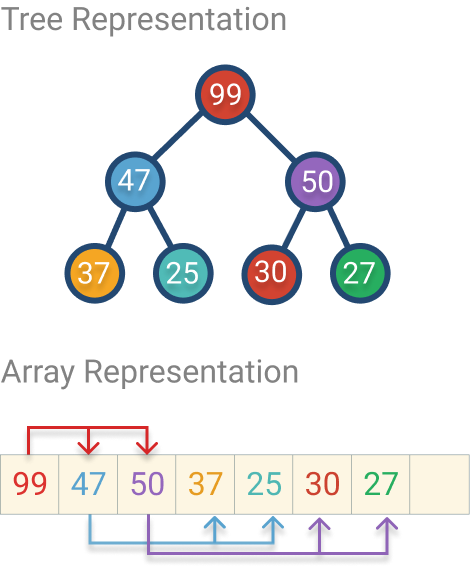

In [ ]:
import heapq

priority_queue = []

heapq.heappush(priority_queue, (2, 'task2'))
print(heapq.heappop(priority_queue))
print(priority_queue)

heapq.heappush(priority_queue, (3, 'task1'))
heapq.heappush(priority_queue, (1, 'task3'))
heapq.heappush(priority_queue, (2, 'task2'))
heapq.heappush(priority_queue, (5, 'task5'))
heapq.heappush(priority_queue, (0, 'task0'))
print(priority_queue)

print(heapq.heappop(priority_queue))
print(heapq.heappop(priority_queue))

(2, 'task2')
[]
[(0, 'task0'), (1, 'task3'), (2, 'task2'), (5, 'task5'), (3, 'task1')]
(0, 'task0')
(1, 'task3')


Сложность? Вспоминаем бинарный поиск, тут нечто похожее - бинарная куча, гарантирует что минимальное всегда в начале

# Least Recent Used cache O(1) implementation
With map and double linked list

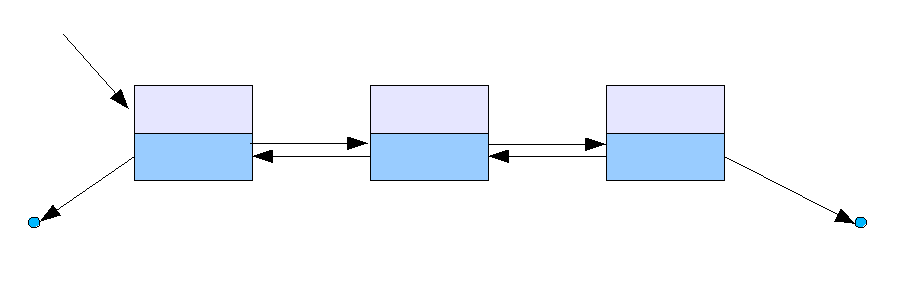

In [ ]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.prev = None
        self.next = None

    def __repr__(self):
        return f'({self.key}, {self.value})'

class LRUCache:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.cache = {}
        self.head = Node(0, 0)
        self.tail = Node(0, 0)
        self.head.next = self.tail
        self.tail.prev = self.head

    def _add(self, node: Node):
        """Add a new node right after the head (most recent)."""
        node.next = self.head.next
        node.prev = self.head
        self.head.next.prev = node
        self.head.next = node


    def get(self, key: int) -> int:
        """Return the value (will always be positive) of the key if the key exists in the cache, otherwise return -1."""
        if key in self.cache:
          node = self.cache[key]
          self._remove(node)
          self._add(node)
          return node.value
        return -1

    def _remove(self, node: Node):
        """Removes a node from the doubly linked list."""
        prev_node = node.prev
        next_node = node.next
        prev_node.next = next_node
        next_node.prev = prev_node

    def put(self, key: int, value: int) -> None:
        """Insert or update the value if the key is not already present."""
        if key in self.cache:
            self._remove(self.cache[key])

        new_node = Node(key, value)
        self._add(new_node)
        self.cache[key] = new_node

        if len(self.cache) > self.capacity:
            lru_node = self.tail.prev
            self._remove(lru_node)
            del self.cache[lru_node.key]

lru = LRUCache(3)
lru.put(1, 1)
print(lru.cache)
lru.put(2, 2)
print(lru.cache)
print(lru.get(1))
print(lru.cache)
lru.put(3, 3)
print(lru.cache)
print(lru.get(2))
print(lru.cache)
lru.put(4, 4)
print(lru.cache)
print(lru.get(1))
print(lru.get(1))
lru.put(2, 2)
print(lru.cache)
print(lru.get(3))
print(lru.cache)
print(lru.get(4))
print(lru.cache)


{1: (1, 1)}
{1: (1, 1), 2: (2, 2)}
1
{1: (1, 1), 2: (2, 2)}
{1: (1, 1), 2: (2, 2), 3: (3, 3)}
2
{1: (1, 1), 2: (2, 2), 3: (3, 3)}
{2: (2, 2), 3: (3, 3), 4: (4, 4)}
-1
-1
{2: (2, 2), 3: (3, 3), 4: (4, 4)}
3
{2: (2, 2), 3: (3, 3), 4: (4, 4)}
4
{2: (2, 2), 3: (3, 3), 4: (4, 4)}
